In [1]:
. /gpfs/bbp.cscs.ch/home/isbister/cortex_etl_jupyter_04_01_23/bin/activate

In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(
    "/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortexetl/"
)
sys.path.append("/gpfs/bbp.cscs.ch/project/proj147/home/isbister/spikewarp3/")
import cortexetl as c_etl
import spikewarp as sw

In [2]:
# Steeve's campaign
# 4_spikesorting_stimulus_test
etl_conf_root = "/gpfs/bbp.cscs.ch/project/proj147/home/isbister/experimental_data/1_silico_spike_sorting/4_etl_converted/4_spikesorting_stimulus_test_neuropixels_8-1-24__8slc_80f_360r_50t_200ms_1_smallest_fiber_gids/"
scores_root = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/0_silico/4_spikesorting_stimulus_test_neuropixels_8-1-24__8slc_80f_360r_50t_200ms_1_smallest_fiber_gids/0fcb7709-b1e9-4d84-b056-5801f20d55af/analysis/scores/"
metrics_path = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/analysis/sorting_quality/sorting_quality.csv"
# sorting_quality.csv
window_prefix = "evoked_SOZ_25ms_"
silico_dicts = {
    "GT": {
        "etl_paths": [
            "/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortexetl/configs/post_physiology_2023/campaigns/spikesorting_stimulus_tests/4_spikesorting_stimulus_test_neuropixels_8-1-24__8slc_80f_360r_50t_200ms_1_smallest_fiber_gids.yaml"
        ],
        "exp_type": "gt",
        "simulation_id": 0,
        "windows": [["evoked_SOZ_100ms"]],
        "analyzer_key": "hex0_spikes",
        "nc": "ALL",
        "plot_tresh_n_gid_spikes": 100,
        "plot_tresh_prop_non_first": 1.0,
        "c": "green",
    },
    #     "HS": {
    #         "etl_paths": [etl_conf_root + "HS/ss/analysis_config_cond_windows.yaml"],
    #         "exp_type": "ss",
    #         "simulation_id": 0,
    #         "windows": [["Cond0_0_100ms_stim", "Cond1_0_100ms_stim", "Cond2_0_100ms_stim", "Cond3_0_100ms_stim", "Cond4_0_100ms_stim", "Cond5_0_100ms_stim", "Cond6_0_100ms_stim", "Cond7_0_100ms_stim", "Cond8_0_100ms_stim", "Cond9_0_100ms_stim", "Cond10_0_100ms_stim", "Cond11_0_100ms_stim"]],
    #         "analyzer_key": "array0",
    #         "nc": "array0",
    #         "plot_tresh_n_gid_spikes": 100,
    #         "plot_tresh_prop_non_first": 1.0,
    #         "c": "grey"
    #     },
    #     "KS": {
    #         "etl_paths": [etl_conf_root + "KS/ss/analysis_config_cond_windows.yaml"],
    #         "exp_type": "ss",
    #         "simulation_id": 0,
    #         "windows": [["Cond0_0_100ms_stim", "Cond1_0_100ms_stim", "Cond2_0_100ms_stim", "Cond3_0_100ms_stim", "Cond4_0_100ms_stim", "Cond5_0_100ms_stim", "Cond6_0_100ms_stim", "Cond7_0_100ms_stim", "Cond8_0_100ms_stim", "Cond9_0_100ms_stim", "Cond10_0_100ms_stim", "Cond11_0_100ms_stim"]],
    #         "analyzer_key": "array0",
    #         "nc": "array0",
    #         "plot_tresh_n_gid_spikes": 100,
    #         "plot_tresh_prop_non_first": 1.0,
    #         "c": "grey"
    #     },
    "KS2": {
        "etl_paths": [etl_conf_root + "KS2/ss/analysis_config_cond_windows.yaml"],
        "scores_path": scores_root + "ks2.csv",
        "metrics_path": metrics_path,
        "exp_type": "ss",
        "simulation_id": 0,
        "windows": [
            [
                "Cond0_0_100ms_stim",
                "Cond1_0_100ms_stim",
                "Cond2_0_100ms_stim",
                "Cond3_0_100ms_stim",
                "Cond4_0_100ms_stim",
                "Cond5_0_100ms_stim",
                "Cond6_0_100ms_stim",
                "Cond7_0_100ms_stim",
                "Cond8_0_100ms_stim",
                "Cond9_0_100ms_stim",
                "Cond10_0_100ms_stim",
                "Cond11_0_100ms_stim",
            ]
        ],
        "analyzer_key": "array0",
        "nc": "array0",
        "plot_tresh_n_gid_spikes": 100,
        "plot_tresh_prop_non_first": 1.0,
        "c": "grey",
    },
    #     "KS2_5": {
    #         "etl_paths": [etl_conf_root + "KS2_5/ss/analysis_config_cond_windows.yaml"],
    #         "exp_type": "ss",
    #         "simulation_id": 0,
    #         "windows": [["Cond0_0_100ms_stim", "Cond1_0_100ms_stim", "Cond2_0_100ms_stim", "Cond3_0_100ms_stim", "Cond4_0_100ms_stim", "Cond5_0_100ms_stim", "Cond6_0_100ms_stim", "Cond7_0_100ms_stim", "Cond8_0_100ms_stim", "Cond9_0_100ms_stim", "Cond10_0_100ms_stim", "Cond11_0_100ms_stim"]],
    #         "analyzer_key": "array0",
    #         "nc": "array0",
    #         "plot_tresh_n_gid_spikes": 100,
    #         "plot_tresh_prop_non_first": 1.0,
    #         "c": "grey"
    #     },
    #     "KS3": {
    #         "etl_paths": [etl_conf_root + "KS3/ss/analysis_config_cond_windows.yaml"],
    #         "exp_type": "ss",
    #         "simulation_id": 0,
    #         "windows": [["Cond0_0_100ms_stim", "Cond1_0_100ms_stim", "Cond2_0_100ms_stim", "Cond3_0_100ms_stim", "Cond4_0_100ms_stim", "Cond5_0_100ms_stim", "Cond6_0_100ms_stim", "Cond7_0_100ms_stim", "Cond8_0_100ms_stim", "Cond9_0_100ms_stim", "Cond10_0_100ms_stim", "Cond11_0_100ms_stim"]],
    #         "analyzer_key": "array0",
    #         "nc": "array0",
    #         "plot_tresh_n_gid_spikes": 100,
    #         "plot_tresh_prop_non_first": 1.0,
    #         "c": "grey"
    #     },
    #     "RP": {
    #         "etl_paths": ["/gpfs/bbp.cscs.ch/project/proj147/home/isbister/experimental_data/0_rat_whisker_reyes_puerta_luhmann/4_etl_converted/S001E026G001/ss/analysis_config_cond_windows.yaml",
    #                      "/gpfs/bbp.cscs.ch/project/proj147/home/isbister/experimental_data/0_rat_whisker_reyes_puerta_luhmann/4_etl_converted/S001E068G001/ss/analysis_config_cond_windows.yaml"],
    #         "exp_type": "vivo",
    #         "simulation_id": 0,
    #         "windows": [["Cond0_0_100ms_stim_C1_0.066667", "Cond1_0_100ms_stim_C2_0.066667", "Cond2_0_100ms_stim_C3_0.066667", "Cond4_0_100ms_stim_C1_1.0", "Cond5_0_100ms_stim_C1_2.0", "Cond6_0_100ms_stim_C1_4.0", "Cond7_0_100ms_stim_C1_7.0"],
    #                    ["Cond0_0_100ms_stim_D1_0.2", "Cond1_0_100ms_stim_D1_1.0", "Cond2_0_100ms_stim_D1_2.0", "Cond3_0_100ms_stim_D1_3.0", "Cond4_0_100ms_stim_D1_4.0", "Cond5_0_100ms_stim_D1_5.0", "Cond6_0_100ms_stim_D1_6.0", "Cond7_0_100ms_stim_D1_7.0", "Cond8_0_100ms_stim_D1_8.0", "Cond9_0_100ms_stim_D1_9.0", "Cond12_0_100ms_stim_E1_0.2", "Cond13_0_100ms_stim_E1_1.0", "Cond14_0_100ms_stim_E1_2.0", "Cond15_0_100ms_stim_E1_3.0", "Cond16_0_100ms_stim_E1_4.0", "Cond17_0_100ms_stim_E1_5.0", "Cond18_0_100ms_stim_E1_6.0", "Cond19_0_100ms_stim_E1_7.0", "Cond20_0_100ms_stim_E1_8.0", "Cond21_0_100ms_stim_E1_9.0", "Cond24_0_100ms_stim_C1_0.2", "Cond25_0_100ms_stim_C1_1.0", "Cond26_0_100ms_stim_C1_2.0", "Cond27_0_100ms_stim_C1_3.0", "Cond28_0_100ms_stim_C1_4.0", "Cond29_0_100ms_stim_C1_5.0", "Cond30_0_100ms_stim_C1_6.0", "Cond31_0_100ms_stim_C1_7.0", "Cond32_0_100ms_stim_C1_8.0", "Cond33_0_100ms_stim_C1_9.0"]],
    #         "analyzer_key": "array0",
    #         "nc": "array0",
    #         "plot_tresh_n_gid_spikes": 30,
    #         "plot_tresh_prop_non_first": 1.0,
    #         "c": "blue"
    #     }
}

# # James' campaign
# # 8_spikesorting_stimulus_test
# etl_conf_root = "/gpfs/bbp.cscs.ch/project/proj147/home/isbister/experimental_data/1_silico_spike_sorting/4_etl_converted/8_spikesorting_stimulus_test_neuropixels_13-4-24__8slc_100f_72r_250t_200ms_0/"
# scores_root = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/postpro/0_silico/8_spikesorting_stimulus_test_neuropixels_13-4-24__8slc_100f_72r_250t_200ms_0/12c5ef9a-1f3b-4b18-b3f5-ec6a417f645c/analysis/scores/"
# metrics_path = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/postpro/0_silico/8_spikesorting_stimulus_test_neuropixels_13-4-24__8slc_100f_72r_250t_200ms_0/12c5ef9a-1f3b-4b18-b3f5-ec6a417f645c/analysis/sorting_quality/sorting_quality.csv"
# window_prefix = "evoked_SOZ_25ms_"
# silico_dicts = {

#     "GT": {
#         "etl_paths": ["/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortexetl/configs/post_physiology_2023/campaigns/spikesorting_stimulus_tests/8_spikesorting_stimulus_test_neuropixels_13-4-24__8slc_100f_72r_250t_200ms_0.yaml"],
#         "exp_type": "gt",
#         "simulation_id": 0,
#         "windows": [["evoked_SOZ_100ms"]],
#         "analyzer_key": "hex0_spikes",
#         "nc": "ALL",
#         "plot_tresh_n_gid_spikes": 100,
#         "plot_tresh_prop_non_first": 1.0,
#         "c": "green"
#     },
# #     "GT2": {
# #         "etl_paths": ["/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortexetl/configs/post_physiology_2023/campaigns/spikesorting_stimulus_tests/11_spikesorting_stimulus_test_neuropixels_16-7-24__8slc_100f_72r_250t_200ms_0.yaml"],
# #         "exp_type": "gt",
# #         "simulation_id": 1,
# #         "windows": [["evoked_SOZ_100ms"]],
# #         "analyzer_key": "hex0_spikes",
# #         "nc": "ALL",
# #         "plot_tresh_n_gid_spikes": 100,
# #         "plot_tresh_prop_non_first": 1.0,
# #         "c": "green"
# #     },
# #     "HS": {
# #         "etl_paths": [etl_conf_root + "HS/ss/analysis_config_cond_windows.yaml"],
# #         "exp_type": "ss",
# #         "simulation_id": 0,
# #         "windows": [["Cond0_0_100ms_stim", "Cond1_0_100ms_stim", "Cond2_0_100ms_stim", "Cond3_0_100ms_stim", "Cond4_0_100ms_stim", "Cond5_0_100ms_stim", "Cond6_0_100ms_stim", "Cond7_0_100ms_stim", "Cond8_0_100ms_stim", "Cond9_0_100ms_stim", "Cond10_0_100ms_stim", "Cond11_0_100ms_stim"]],
# #         "analyzer_key": "array0",
# #         "nc": "array0",
# #         "plot_tresh_n_gid_spikes": 100,
# #         "plot_tresh_prop_non_first": 1.0,
# #         "c": "grey"
# #     },
# #     "KS": {
# #         "etl_paths": [etl_conf_root + "KS/ss/analysis_config_cond_windows.yaml"],
# #         "exp_type": "ss",
# #         "simulation_id": 0,
# #         "windows": [["Cond0_0_100ms_stim", "Cond1_0_100ms_stim", "Cond2_0_100ms_stim", "Cond3_0_100ms_stim", "Cond4_0_100ms_stim", "Cond5_0_100ms_stim", "Cond6_0_100ms_stim", "Cond7_0_100ms_stim", "Cond8_0_100ms_stim", "Cond9_0_100ms_stim", "Cond10_0_100ms_stim", "Cond11_0_100ms_stim"]],
# #         "analyzer_key": "array0",
# #         "nc": "array0",
# #         "plot_tresh_n_gid_spikes": 100,
# #         "plot_tresh_prop_non_first": 1.0,
# #         "c": "grey"
# #     },
#     "KS2": {
#         "etl_paths": [etl_conf_root + "KS2/ss/analysis_config_cond_windows.yaml"],
#         "scores_path": scores_root + "ks2.csv",
#         "metrics_path": metrics_path,
#         "exp_type": "ss",
#         "simulation_id": 0,
#         "windows": [["Cond0_0_100ms_stim", "Cond1_0_100ms_stim", "Cond2_0_100ms_stim", "Cond3_0_100ms_stim", "Cond4_0_100ms_stim", "Cond5_0_100ms_stim", "Cond6_0_100ms_stim", "Cond7_0_100ms_stim", "Cond8_0_100ms_stim", "Cond9_0_100ms_stim", "Cond10_0_100ms_stim", "Cond11_0_100ms_stim"]],
#         "analyzer_key": "array0",
#         "nc": "array0",
#         "plot_tresh_n_gid_spikes": 100,
#         "plot_tresh_prop_non_first": 1.0,
#         "c": "grey"
#     },
# #     "KS2_5": {
# #         "etl_paths": [etl_conf_root + "KS2_5/ss/analysis_config_cond_windows.yaml"],
# #         "exp_type": "ss",
# #         "simulation_id": 0,
# #         "windows": [["Cond0_0_100ms_stim", "Cond1_0_100ms_stim", "Cond2_0_100ms_stim", "Cond3_0_100ms_stim", "Cond4_0_100ms_stim", "Cond5_0_100ms_stim", "Cond6_0_100ms_stim", "Cond7_0_100ms_stim", "Cond8_0_100ms_stim", "Cond9_0_100ms_stim", "Cond10_0_100ms_stim", "Cond11_0_100ms_stim"]],
# #         "analyzer_key": "array0",
# #         "nc": "array0",
# #         "plot_tresh_n_gid_spikes": 100,
# #         "plot_tresh_prop_non_first": 1.0,
# #         "c": "grey"
# #     },
# #     "KS3": {
# #         "etl_paths": [etl_conf_root + "KS3/ss/analysis_config_cond_windows.yaml"],
# #         "exp_type": "ss",
# #         "simulation_id": 0,
# #         "windows": [["Cond0_0_100ms_stim", "Cond1_0_100ms_stim", "Cond2_0_100ms_stim", "Cond3_0_100ms_stim", "Cond4_0_100ms_stim", "Cond5_0_100ms_stim", "Cond6_0_100ms_stim", "Cond7_0_100ms_stim", "Cond8_0_100ms_stim", "Cond9_0_100ms_stim", "Cond10_0_100ms_stim", "Cond11_0_100ms_stim"]],
# #         "analyzer_key": "array0",
# #         "nc": "array0",
# #         "plot_tresh_n_gid_spikes": 100,
# #         "plot_tresh_prop_non_first": 1.0,
# #         "c": "grey"
# #     },
# #     "RP": {
# #         "etl_paths": ["/gpfs/bbp.cscs.ch/project/proj147/home/isbister/experimental_data/0_rat_whisker_reyes_puerta_luhmann/4_etl_converted/S001E026G001/ss/analysis_config_cond_windows.yaml",
# #                      "/gpfs/bbp.cscs.ch/project/proj147/home/isbister/experimental_data/0_rat_whisker_reyes_puerta_luhmann/4_etl_converted/S001E068G001/ss/analysis_config_cond_windows.yaml"],
# #         "exp_type": "vivo",
# #         "simulation_id": 0,
# #         "windows": [["Cond0_0_100ms_stim_C1_0.066667", "Cond1_0_100ms_stim_C2_0.066667", "Cond2_0_100ms_stim_C3_0.066667", "Cond4_0_100ms_stim_C1_1.0", "Cond5_0_100ms_stim_C1_2.0", "Cond6_0_100ms_stim_C1_4.0", "Cond7_0_100ms_stim_C1_7.0"],
# #                    ["Cond0_0_100ms_stim_D1_0.2", "Cond1_0_100ms_stim_D1_1.0", "Cond2_0_100ms_stim_D1_2.0", "Cond3_0_100ms_stim_D1_3.0", "Cond4_0_100ms_stim_D1_4.0", "Cond5_0_100ms_stim_D1_5.0", "Cond6_0_100ms_stim_D1_6.0", "Cond7_0_100ms_stim_D1_7.0", "Cond8_0_100ms_stim_D1_8.0", "Cond9_0_100ms_stim_D1_9.0", "Cond12_0_100ms_stim_E1_0.2", "Cond13_0_100ms_stim_E1_1.0", "Cond14_0_100ms_stim_E1_2.0", "Cond15_0_100ms_stim_E1_3.0", "Cond16_0_100ms_stim_E1_4.0", "Cond17_0_100ms_stim_E1_5.0", "Cond18_0_100ms_stim_E1_6.0", "Cond19_0_100ms_stim_E1_7.0", "Cond20_0_100ms_stim_E1_8.0", "Cond21_0_100ms_stim_E1_9.0", "Cond24_0_100ms_stim_C1_0.2", "Cond25_0_100ms_stim_C1_1.0", "Cond26_0_100ms_stim_C1_2.0", "Cond27_0_100ms_stim_C1_3.0", "Cond28_0_100ms_stim_C1_4.0", "Cond29_0_100ms_stim_C1_5.0", "Cond30_0_100ms_stim_C1_6.0", "Cond31_0_100ms_stim_C1_7.0", "Cond32_0_100ms_stim_C1_8.0", "Cond33_0_100ms_stim_C1_9.0"]],
# #         "analyzer_key": "array0",
# #         "nc": "array0",
# #         "plot_tresh_n_gid_spikes": 30,
# #         "plot_tresh_prop_non_first": 1.0,
# #         "c": "blue"
# #     }
# }

# Load data

In [3]:
import math


def deg_to_rad(dr):
    return (dr * math.pi) / 180


# silico_dict_keys = ["KS", "GT", "GT2"]
# "HS", "KS", "KS2", "KS2_5", "KS3",
silico_dict_keys = ["KS2", "GT"]
n_silico_dict_keys = len(silico_dict_keys)
for silico_dict_key in silico_dict_keys:
    print(silico_dict_key)
    silico_dict = silico_dicts[silico_dict_key]

    a_s = []
    for etl_path in silico_dict["etl_paths"]:

        ma = c_etl.analysis_initial_processing(
            etl_path, create_figure_dirs=False, loglevel="ERROR"
        )
        a = getattr(ma, silico_dict["analyzer_key"])

        if silico_dict["exp_type"] == "ss":

            """
            Rotation info
            """
            ss_window_info_df = pd.DataFrame(
                ma.global_config.custom["window_info_dict"]
            ).T
            ss_window_info_df = ss_window_info_df.rename_axis("window")
            silico_dict["ss_stim_windows_df"] = pd.merge(
                a.repo.windows.df, ss_window_info_df, on=["window"]
            )

            """
            Unit info
            """
            ss_unit_info_df = pd.DataFrame(a.analysis_config.custom["unit_info_dict"]).T
            ss_unit_info_df = ss_unit_info_df.rename_axis("gid").reset_index()
            silico_dict["ss_unit_info_df"] = pd.merge(
                a.repo.neurons.df, ss_unit_info_df, on=["gid"]
            )

            """
            Load similarity (prob of each ground truth unit being one of the spike sorted units) + categarisation data
            """
            sorting_quality_table = pd.read_csv(silico_dict["metrics_path"])
            exp_sorting_quality_table = sorting_quality_table[
                (sorting_quality_table["sorter"] == "KS2")
                & (sorting_quality_table["experiment"] == "E")
            ]
            exp_sorting_quality_table = exp_sorting_quality_table.rename(
                columns={"sorted": "sorted1"}
            )
            silico_dict["exp_sorting_quality_table"] = exp_sorting_quality_table

            sorted_unit_prob_for_each_gt_gid = pd.read_csv(
                silico_dict["scores_path"]
            ).rename(columns={"Unnamed: 0": "true_gid"})
            silico_dict["sorted_unit_prob_for_each_gt_gid"] = (
                sorted_unit_prob_for_each_gt_gid
            )

        elif silico_dict["exp_type"] == "gt":

            # Simulations
            a.repo.simulations.df["rotations_array"] = a.repo.simulations.df.apply(
                lambda row: np.fromstring(row["rotations"], dtype=float, sep=","),
                axis=1,
            )
            a.repo.simulations.df["first_rotation"] = a.repo.simulations.df.apply(
                lambda row: row["rotations_array"][0], axis=1
            )

            # Windows
            rotation_windows = [
                i for i in list(a.repo.windows.df.window.unique()) if window_prefix in i
            ]
            a.repo.windows.df["rotation"] = a.repo.windows.df.apply(
                lambda row: (
                    float(row["window"].split("_")[-1])
                    + a.repo.simulations.df.etl.q(
                        simulation_id=row["simulation_id"]
                    ).iloc[0]["first_rotation"]
                    if row["window"] in rotation_windows
                    else np.nan
                ),
                axis=1,
            )
            a.repo.windows.df["rotation_radians"] = deg_to_rad(
                a.repo.windows.df["rotation"]
            )

        a_s.append(a)

    silico_dict["a_s"] = a_s

KS2
GT


In [ ]:
print(silico_dicts["KS2"]["sorted_unit_prob_for_each_gt_gid"])
print(silico_dicts["KS2"]["exp_sorting_quality_table"])

# Tuning curve plots

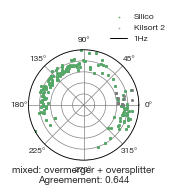

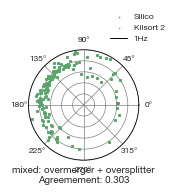

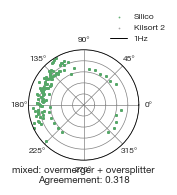

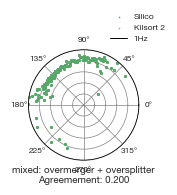

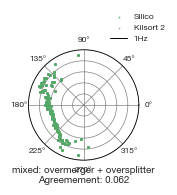

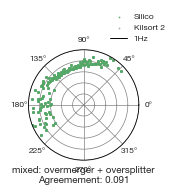

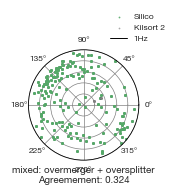

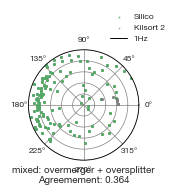

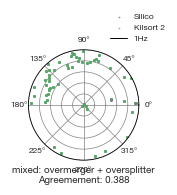

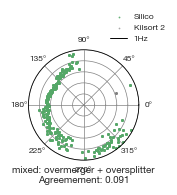


KeyboardInterrupt



Error in callback <function flush_figures at 0x2aab6fd7f6d0> (for post_execute):



KeyboardInterrupt



In [26]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.linalg import norm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib import ticker as mticker
import os

gt_silico_dict = silico_dicts["GT"]
ss_silico_dict = silico_dicts["KS2"]
gt_a = gt_silico_dict["a_s"][0]
ss_a = ss_silico_dict["a_s"][0]
gt_stim_windows = gt_a.repo.windows.df.etl.q(t_start=0.0, t_stop=25.0).window.unique()
ss_stim_windows = ss_a.repo.windows.df.etl.q(t_start=0.0, t_stop=25.0).window.unique()
ss_window_by_gid_features = ss_a.features.by_gid.df.etl.q(
    window=ss_stim_windows
).reset_index()
ss_window_by_gid_features = pd.merge(
    ss_window_by_gid_features, ss_silico_dict["ss_stim_windows_df"], on="window"
)

gt_sim_window_by_gid_features = gt_a.features.by_gid.df.etl.q(
    window=gt_stim_windows,
    gid=ss_silico_dict["sorted_unit_prob_for_each_gt_gid"]["true_gid"],
    neuron_class="ALL",
).reset_index()

gt_sim_window_features_by_gid = pd.merge(
    gt_sim_window_by_gid_features,
    gt_a.repo.windows.df.loc[
        :, ["simulation_id", "window", "rotation", "rotation_radians"]
    ],
    on=["simulation_id", "window"],
)

# stat_key = "first_spike_time_means_cort_zeroed" # comment out this to get mean firing rate
stat_key = "mean_spike_counts"  # uncomment this for firing rate
similarity_prob_threshold = 0.05
minimum_mean_gt_fr = 0.1

figsize = (2.0, 3.0)
s = 0.2
gt_c = "g"
ss_c = "grey"
# os.makedirs(outdir, exist_ok=True)
filenames = []


for gt_gid in np.asarray(
    ss_silico_dict["sorted_unit_prob_for_each_gt_gid"]["true_gid"]
):
    gid_gt_sim_window_by_gid_features = gt_sim_window_features_by_gid.etl.q(gid=gt_gid)

    ss_probs = (
        ss_silico_dict["sorted_unit_prob_for_each_gt_gid"]
        .etl.q(true_gid=gt_gid)
        .iloc[0, 1:]
    )
    highest_prob_ss_id = ss_probs.idxmax()
    highest_prob = ss_probs.loc[highest_prob_ss_id]
    sorted_quality_row = ss_silico_dict["exp_sorting_quality_table"].etl.q(
        sorted1=int(highest_prob_ss_id)
    )

    if len(sorted_quality_row) == 0:
        """
        Best match with a "bad" unit
        """
    else:
        """
        Best match with a "good" unit
        """
        sorted_quality_row = sorted_quality_row.iloc[0]
        ss_gid = (
            ss_silico_dict["ss_unit_info_df"]
            .etl.q(original_sorting_id=int(highest_prob_ss_id))
            .iloc[0]["gid"]
        )

        if (
            gid_gt_sim_window_by_gid_features.mean_firing_rates_per_second.mean()
            > minimum_mean_gt_fr
        ) & (
            highest_prob > similarity_prob_threshold
        ):  #  if (len(high_spike_count_trials_gt_gid_features_df) > ntrials_above_high_spike_count_threshold):

            draw_individual = True
            if draw_individual:

                fig, ax = plt.subplots(
                    subplot_kw={"projection": "polar"}, figsize=figsize
                )

                # GROUND TRUTH POINTS
                gt_theta = gid_gt_sim_window_by_gid_features["rotation_radians"]
                gt_r = gid_gt_sim_window_by_gid_features[stat_key]
                gt_p = ax.scatter(gt_theta, gt_r, s=s, c=gt_c, label="Silico")

                gid_ss_window_by_gid_features = ss_window_by_gid_features.etl.q(
                    gid=ss_gid
                )
                ss_theta = gid_ss_window_by_gid_features["rotation_radians"]
                ss_r = gid_ss_window_by_gid_features[stat_key]

                # SPIKE SORTED POINTS
                ss_p = ax.scatter(
                    ss_theta, ss_r, s=s, c=ss_c, label="Kilsort 2", alpha=0.7
                )

                #             # GROUNT TRUTH MEAN VECTOR
                #             ax.plot([0.0, gt_tuning_row['mean_angle']], [0.0, gt_tuning_row['mean_r_nonzero']], c=gt_c, lw=1.0)

                #             # SPIKE SORTED MEAN VECTOR
                #             if len(ss_tuning_single):
                #                 ax.plot([0.0, ss_tuning_row['mean_angle']], [0.0, ss_tuning_row['mean_r_nonzero']], c=ss_c, alpha=0.7) #, lw=1.0

                # PLOT OPTIONS
                if stat_key == "mean_spike_counts":
                    ax.set_rticks([0.25, 0.5, 0.75, 1.0])
                    ax.set_rmax(1.0)

                elif stat_key == "first_spike_time_means_cort_zeroed":
                    ax.set_rticks([0.0, 5.0, 10.0, 15.0, 20.0, 25.0])
                    ax.set_rmax(25.0)

                ax.tick_params(axis="x", pad=-2)
                ax.grid(which="major", color="grey", linewidth=0.5)
                ax.spines["polar"].set_color(border_color)
                ax.set_yticklabels([])
                border_color = "black"

                agreement_string = "Agreemement: %.3f" % highest_prob
                ax.set_title(
                    sorted_quality_row["quality"] + "\n" + agreement_string,
                    va="bottom",
                    y=-0.3,
                )
                line = Line2D([0], [0], color=border_color, label="1Hz", lw=0.7)
                plt.legend(
                    handles=[gt_p, ss_p, line], frameon=False, bbox_to_anchor=(1.3, 1.4)
                )

                plt.tight_layout()
                plt.show()
                plt.close()
    #                 filename = outdir + str(gid) + '.png'
    #                 filenames.append(filename)
    #                 plt.savefig(filename, dpi=300)

    #                 filename_pdf = outdir + str(gid) + '.pdf'
    #                 plt.savefig(filename_pdf)
    #     #                 plt.show()
    #                 plt.close()